# Malaria Detecetion: Data Exploration

In [1]:
%matplotlib inline

# Install kaggle
!pip install kaggle

# install tqdm to show progress bars
!pip install tqdm

  Using cached https://files.pythonhosted.org/packages/9e/94/5370052b9cbc63a927bda08c4f7473a35d3bb27cc071baa1a83b7f783352/kaggle-1.5.1.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/31/39/53096f9217b057cb049fe872b7fc7ce799a1a89b76cf917d9639e7a558b5/Unidecode-1.0.23-py2.py3-none-any.whl
  Running setup.py bdist_wheel for kaggle ... done
  Stored in directory: /gpfs/fs01/user/sc4d-b22dc8ad95c686-af87f7a66703/.cache/pip/wheels/5a/2d/0c/9fc539e558586b9ed9127916a7f4e620163c24cc97460b1188
  Running setup.py bdist_wheel for python-slugify ... done
  Stored in directory: /gpfs/fs01/user/sc4d-b22dc8ad95c686-af87f7a66703/.cache/pip/wheels/2b/9e/c8/14a18ab55d8f144384de8186a3df8401dcc9264936f71d470f
Successfully built kaggle python-slugify
tensorflow 1.2.1 has requirement bleach==1.5.0, but you'll have bleach 2.0.0 which is incompatible.
tensorflow 1.2.1 has requirement html5lib==0.9999999, but you'll have html5lib 0.999999999 which is incompatible.
  The script unidecode is insta

In [2]:
# get your credentials in kaggle and add them to kaggle.json
kCreds = open("/gpfs/fs01/user/sc4d-b22dc8ad95c686-af87f7a66703/.kaggle/kaggle.json", "w")
kCreds.write("{\"username\":\"USERNAME\",\"key\":\"KEY\"}")
kCreds.close()

# adjust file permissions
!chmod 600 /gpfs/fs01/user/sc4d-b22dc8ad95c686-af87f7a66703/.kaggle/kaggle.json

# view kaggle credentials
!cat /gpfs/fs01/user/sc4d-b22dc8ad95c686-af87f7a66703/.kaggle/kaggle.json

{"username":"aineuro","key":"a37c64b430dee8d963f7012829b5e879"}

In [3]:
# download malaria dataset via kaggle
# !rm cell-images-for-detecting-malaria.zip
!/gpfs/fs01/user/sc4d-b22dc8ad95c686-af87f7a66703/.local/bin/kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

# check folder whether file exists
!ls -l cell-images-for-detecting-malaria.zip

cell-images-for-detecting-malaria.zip: Skipping, found more recently modified local copy (use --force to force download)
-rw-------. 1 sc4d-b22dc8ad95c686-af87f7a66703 users 353452851 Jan 20 05:17 cell-images-for-detecting-malaria.zip


In [4]:
# get list of image names and get distributions of image widths and heights
# to choose a good scale factor for image resizing later on
import tqdm
import numpy as np
from PIL import Image
import zipfile

sDirs = ['Parasitized', 'Uninfected']

# get image list from zip file
zipRef = zipfile.ZipFile('./cell-images-for-detecting-malaria.zip')
cFiles = zipRef.namelist()
cImgs  = [s for s in cFiles if "png" in s]

probImgs = []

sX = []
sY = []

for i in tqdm.trange(len(cImgs)):
#for i in tqdm.trange(10):
    cImg = cImgs[i]
    
    zImg = zipRef.open(cImg)

    # get this image's size
    try:                
        imgObj = Image.open(zImg)
        
        (cX, cY) = imgObj.size
        sX.append(cX)
        sY.append(cY)                
                
    except:
        print('Could not work on {}'.format(cImg))
        probImgs.append(cImg)
            

zipRef.close()

100%|██████████| 27558/27558 [00:09<00:00, 3000.66it/s]


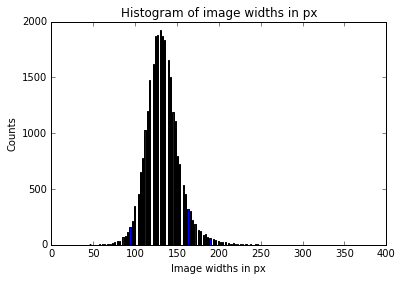

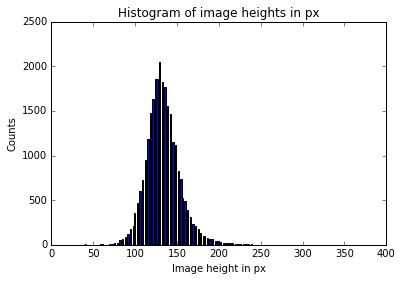

In [5]:
import matplotlib.pyplot as plt
x = np.array(sX)
plt.hist(x, bins='auto')
plt.xlabel('Image widths in px')
plt.ylabel('Counts')
plt.title('Histogram of image widths in px')
plt.show()

y = np.array(sY)
plt.hist(y, bins='auto')
plt.xlabel('Image height in px')
plt.ylabel('Counts')
plt.title('Histogram of image heights in px')
plt.show()